In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from functools import partial

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [8]:
DefaultConv2D = partial(Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=[28, 28, 1]),
    MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax'),
])


In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        1600      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [10]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 81s 46ms/step - loss: 0.6127 - accuracy: 0.7850 - val_loss: 0.3491 - val_accuracy: 0.8674
Epoch 2/20
1719/1719 [==============================] - 75s 43ms/step - loss: 0.3964 - accuracy: 0.8635 - val_loss: 0.3111 - val_accuracy: 0.8850
Epoch 3/20
1719/1719 [==============================] - 74s 43ms/step - loss: 0.3411 - accuracy: 0.8803 - val_loss: 0.2798 - val_accuracy: 0.8972
Epoch 4/20
1719/1719 [==============================] - 74s 43ms/step - loss: 0.3054 - accuracy: 0.8944 - val_loss: 0.2716 - val_accuracy: 0.8982
Epoch 5/20
1719/1719 [==============================] - 75s 44ms/step - loss: 0.2774 - accuracy: 0.9020 - val_loss: 0.2931 - val_accuracy: 0.8974
Epoch 6/20
1719/1719 [==============================] - 74s 43ms/step - loss: 0.2574 - accuracy: 0.9076 - val_loss: 0.2701 - val_accuracy: 0.9004
Epoch 7/20
1719/1719 [==============================] - 74s 43ms/step - loss: 0.2458 - accuracy: 0.9120 - val_loss: 0.2799 -

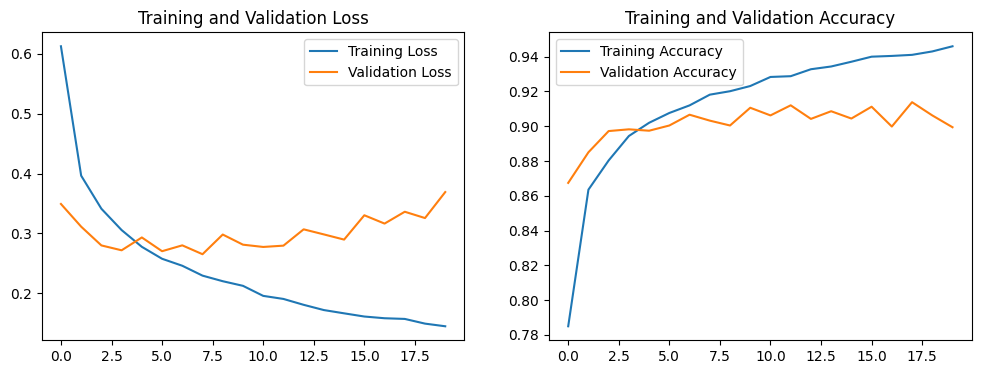

In [11]:
# 훈련 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [14]:
# 모델 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.3819 - accuracy: 0.9000


[0.38185247778892517, 0.8999999761581421]